## Sección 1

### Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo

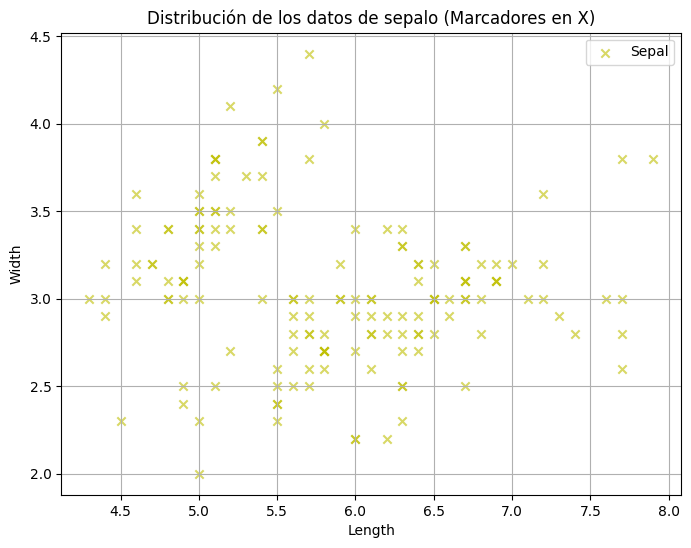

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], alpha=0.6, label="Sepal", color='y', marker='x')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Distribución de los datos de sepalo (Marcadores en X)")
plt.legend()
plt.grid(True)
plt.show()



### Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

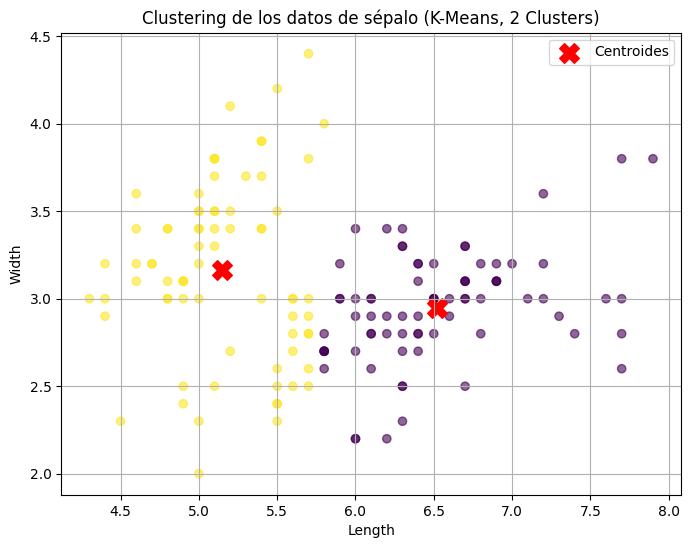

In [2]:
from sklearn.cluster import KMeans

X = df[["sepal_length", "sepal_width"]]

kmeans = KMeans(n_clusters=2)
df["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Clustering de los datos de sépalo (K-Means, 2 Clusters)")
plt.legend()
plt.grid(True)
plt.show()


### Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?

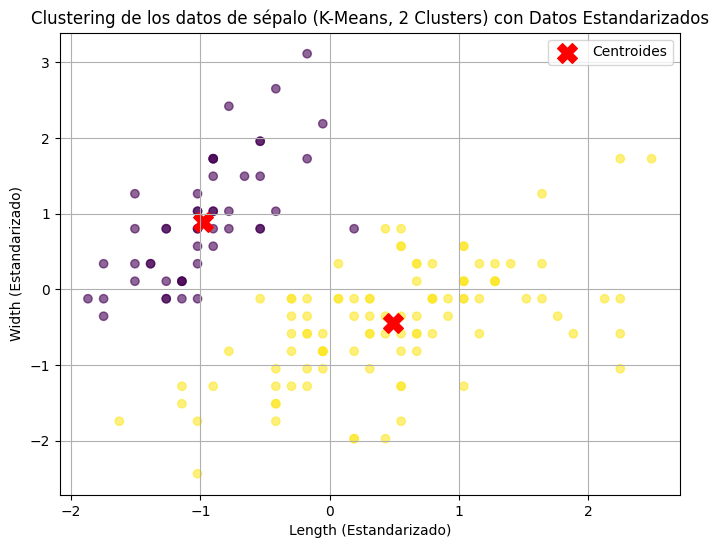

In [3]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 2 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

R// La principal diferencia que se puede apreciar en este inciso es que los centroides de ambos clusters han cambiado su posición y por ende los clusters han cambiado su contenido debido a la posición de los centroides.

### Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

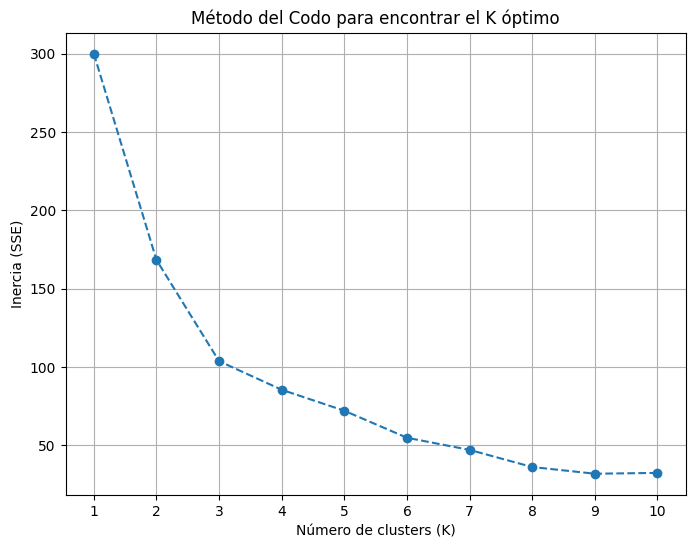

In [4]:
X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

inertia = []
rango_K = range(1, 11)  

for k in rango_K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_escalado)
    inertia.append(kmeans.inertia_)  
    
plt.figure(figsize=(8, 6))
plt.plot(rango_K, inertia, marker="o", linestyle="--")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para encontrar el K óptimo")
plt.xticks(rango_K)
plt.grid(True)
plt.show()
    

### Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

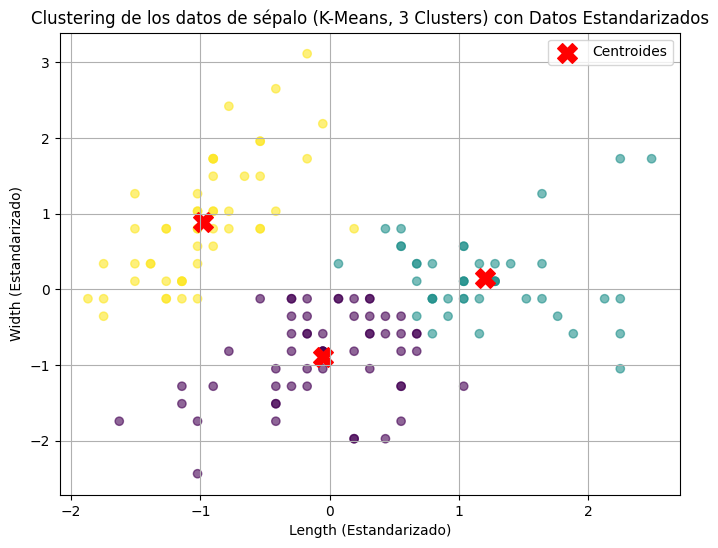

In [5]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

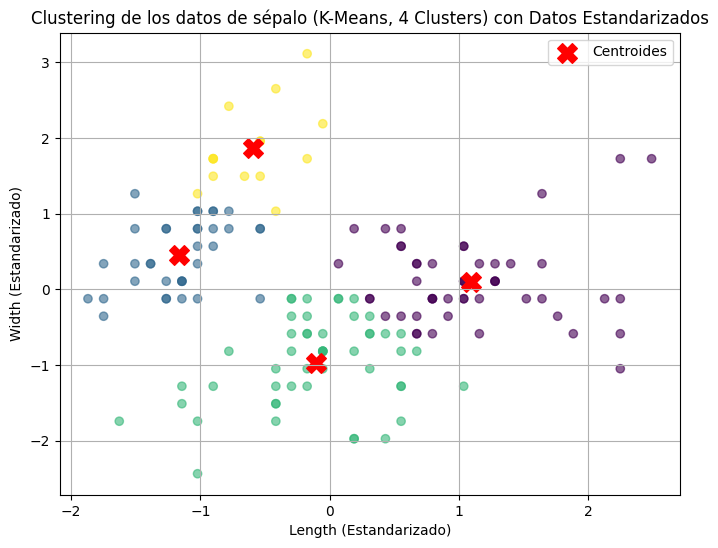

In [6]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 4 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

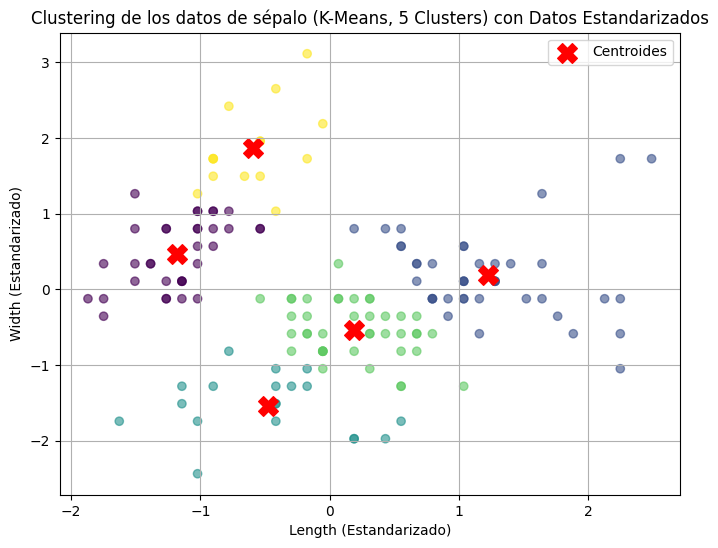

In [7]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 5 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

### Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

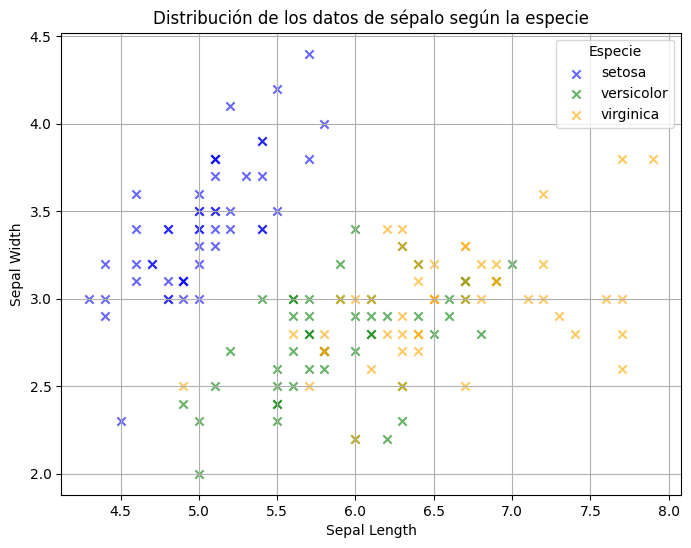

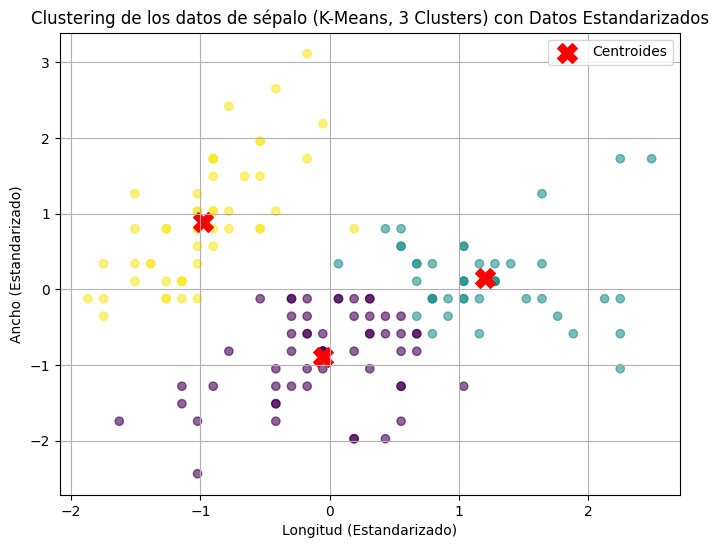

In [8]:
df_nuevo = pd.read_csv("iris-con-respuestas.csv")

especies_unicas = df_nuevo["species"].unique()
colores = ["blue", "green", "orange"]  

plt.figure(figsize=(8, 6))

for i, especie in enumerate(especies_unicas):
    subconjunto = df_nuevo[df_nuevo["species"] == especie]
    plt.scatter(subconjunto["sepal_length"], subconjunto["sepal_width"], 
                color=colores[i], alpha=0.6, label=especie, marker='x')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Distribución de los datos de sépalo según la especie")
plt.legend(title="Especie")
plt.grid(True)

X = df_nuevo[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_nuevo["cluster"] = modelo_kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df_nuevo["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Longitud (Estandarizado)")
plt.ylabel("Ancho (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)

plt.show()


### Discusión


Como se puede en el método del codo, el resultado obtenido en esta sección fue de 3 para el valor de 'k', comparando con los resultados reales, podemos ver que estamos en lo correcto, ya que son 3 grupos o clusters en los datos, con esto podemos decir que se obtuvo un 100% de efectividad en el calculo del valor de 'k' en el método del codo.

### ¿Funcionó el clustering con la forma del sépalo?

Si funciono, ya que como se menciono anteriormente, al normalizar los datos y aplicar el método del codo para el clustering se logró obtener el resultado esperado para dividir correctamente los datos en sus grupos correctos tal y como se puede ver en los datos reales.

## Sección 2

### Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del pétalo

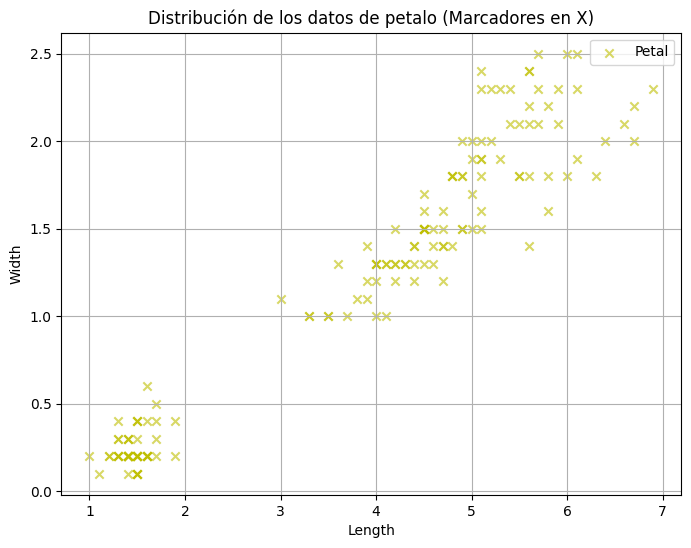

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["petal_length"], df["petal_width"], alpha=0.6, label="Petal", color='y', marker='x')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Distribución de los datos de petalo (Marcadores en X)")
plt.legend()
plt.grid(True)
plt.show()



### Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

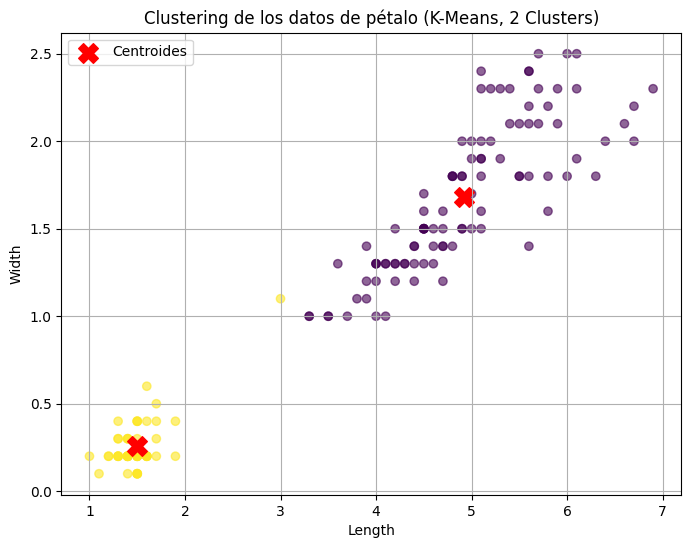

In [10]:
from sklearn.cluster import KMeans

X = df[["petal_length", "petal_width"]]

kmeans = KMeans(n_clusters=2)
df["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df["petal_length"], df["petal_width"], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Clustering de los datos de pétalo (K-Means, 2 Clusters)")
plt.legend()
plt.grid(True)
plt.show()

### Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?

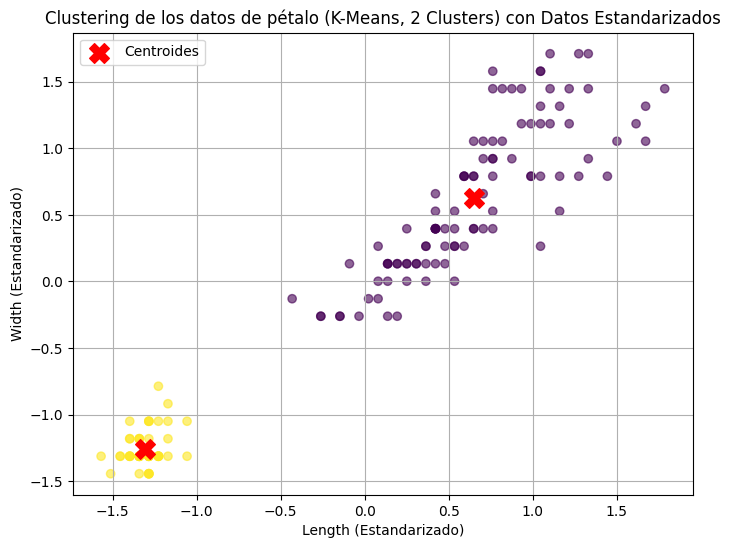

In [11]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 2 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

R// Con la estandarización de los datos, podemos ver que ahora por medio de los 2 clusters se pueden percibir mejor la agrupación de los datos, ya que antes de la estandarización un dato que estaba cerca del centroide superior se percibia como parte del cluster inferior, pero luego de la estandarización ya se arreglo ese error en las agrupaciones de los datos.

#### Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

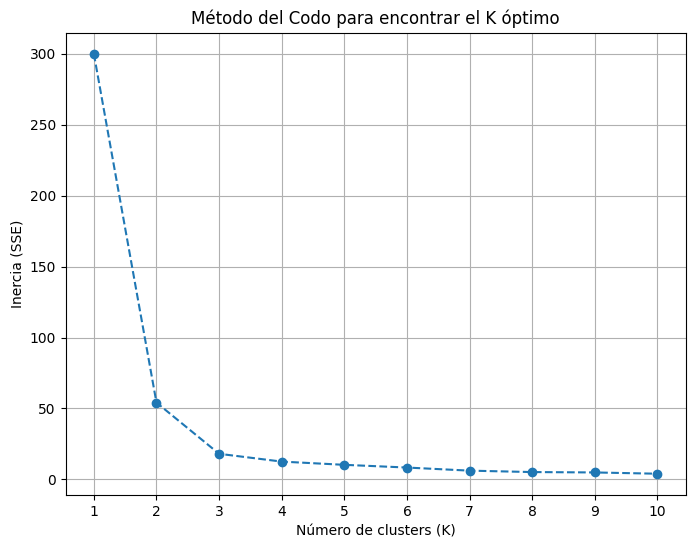

In [12]:
X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

inertia = []
rango_K = range(1, 11)  

for k in rango_K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_escalado)
    inertia.append(kmeans.inertia_)  
    
plt.figure(figsize=(8, 6))
plt.plot(rango_K, inertia, marker="o", linestyle="--")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para encontrar el K óptimo")
plt.xticks(rango_K)
plt.grid(True)
plt.show()

### Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

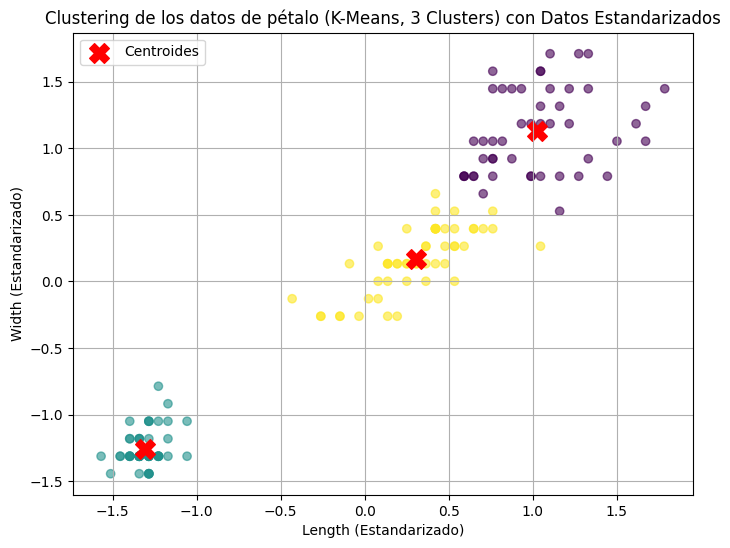

In [13]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

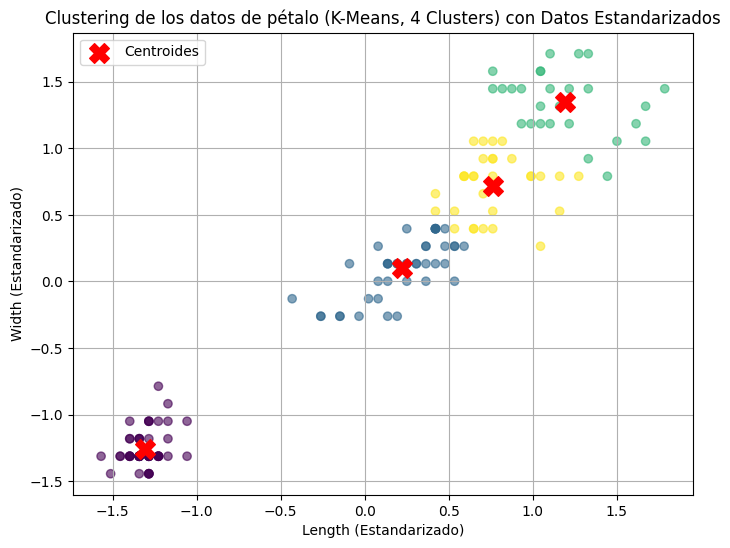

In [14]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 4 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

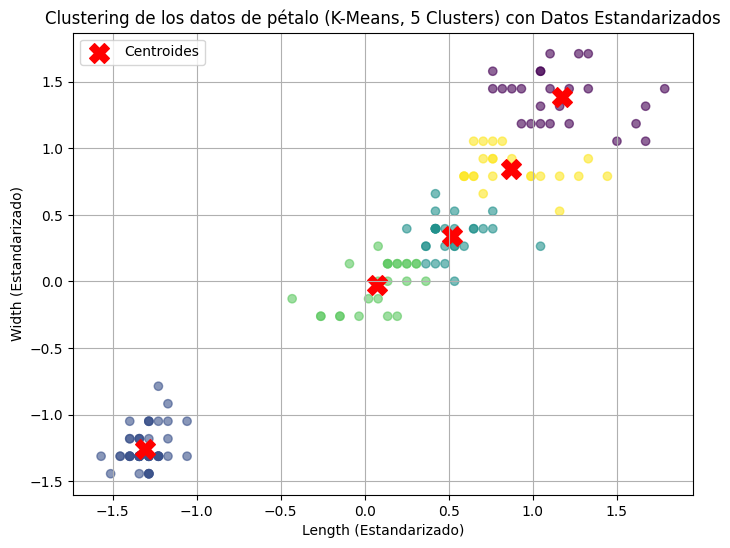

In [15]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 5 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

### Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

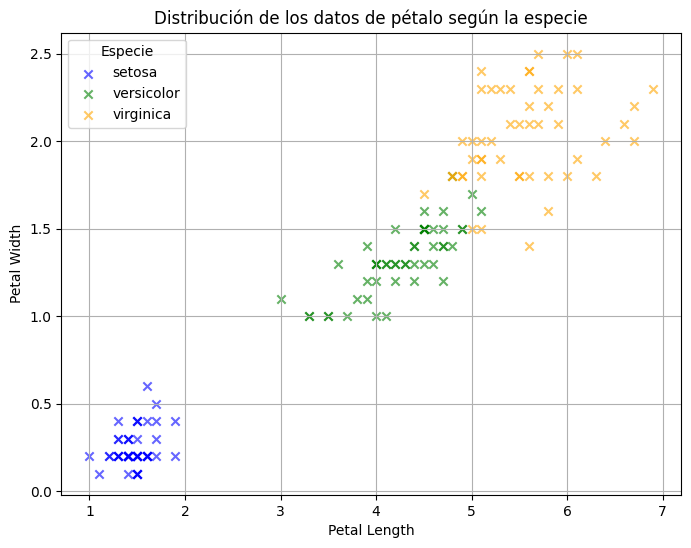

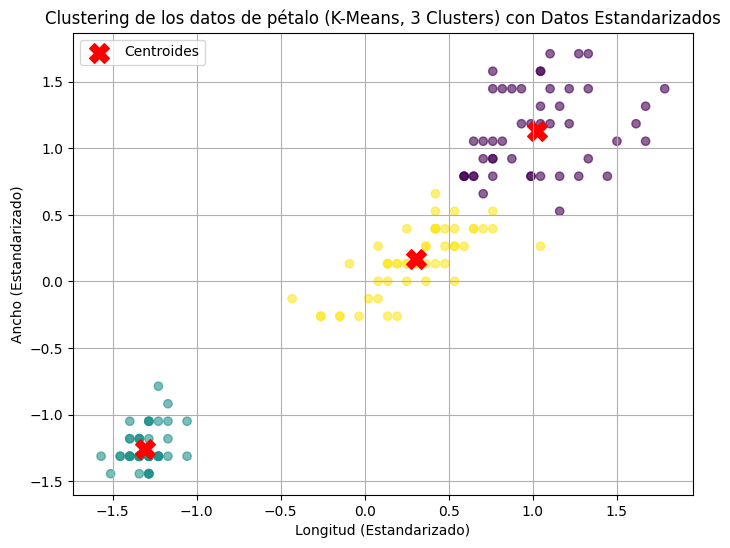

In [16]:
df_nuevo = pd.read_csv("iris-con-respuestas.csv")

especies_unicas = df_nuevo["species"].unique()
colores = ["blue", "green", "orange"]  

plt.figure(figsize=(8, 6))

for i, especie in enumerate(especies_unicas):
    subconjunto = df_nuevo[df_nuevo["species"] == especie]
    plt.scatter(subconjunto["petal_length"], subconjunto["petal_width"], 
                color=colores[i], alpha=0.6, label=especie, marker='x')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Distribución de los datos de pétalo según la especie")
plt.legend(title="Especie")
plt.grid(True)

X = df_nuevo[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_nuevo["cluster"] = modelo_kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df_nuevo["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Longitud (Estandarizado)")
plt.ylabel("Ancho (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)

plt.show()

### Discusión

Como se puede en el método del codo, el resultado arrojado es que el numero óptimo de k esta entre 2-3, comparando con los datos reales podemos ver que son 3 grupos o clusters como tal, esto indica que se pudo encontrar el numero óptimo de k con un pequeño margen de error, ya que si hubiesemos escogido 2 como el valor de k entonces no estaria del todo correcto la division de los clusters.

### ¿Funcionó el clustering con la forma del sépalo?


Si, ya que logramos obtener el resultado esperado, que eran 3 clusters para los pétalos, este resultado se pudo comparar y confirmar con los datos reales proporcionados.

## Sección 3

### Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente. ¿A que podría deberse la diferencia, si la hay? ¿Les dió el número correcto de clusters, comparado a los datos reales? Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

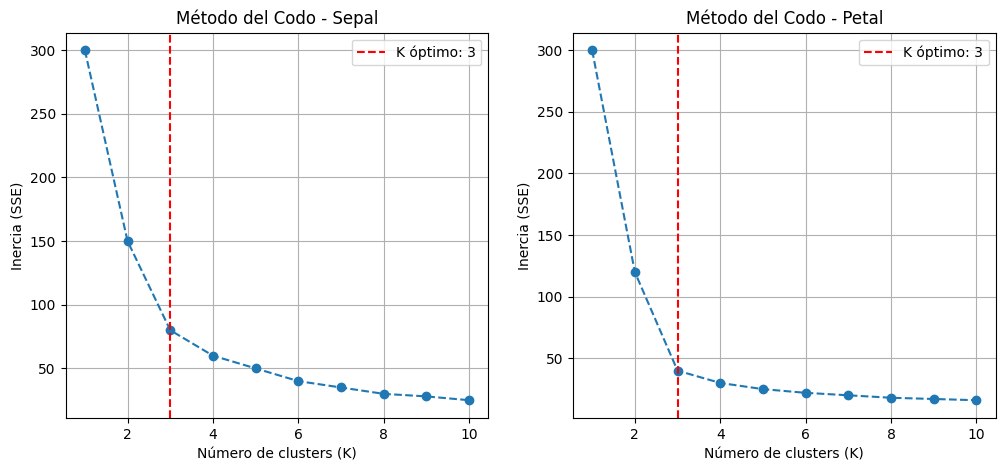

(np.int64(3), np.int64(3))

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

inertia_sepal = [300, 150, 80, 60, 50, 40, 35, 30, 28, 25]  
inertia_petal = [300, 120, 40, 30, 25, 22, 20, 18, 17, 16]  
rango_K = np.arange(1, 11)

kneedle_sepal = KneeLocator(rango_K, inertia_sepal, curve="convex", direction="decreasing")
k_optimo_sepal = kneedle_sepal.elbow

kneedle_petal = KneeLocator(rango_K, inertia_petal, curve="convex", direction="decreasing")
k_optimo_petal = kneedle_petal.elbow

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rango_K, inertia_sepal, marker="o", linestyle="--")
plt.axvline(x=k_optimo_sepal, color="r", linestyle="--", label=f"K óptimo: {k_optimo_sepal}")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo - Sepal")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(rango_K, inertia_petal, marker="o", linestyle="--")
plt.axvline(x=k_optimo_petal, color="r", linestyle="--", label=f"K óptimo: {k_optimo_petal}")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo - Petal")
plt.legend()
plt.grid(True)

plt.show()

k_optimo_sepal, k_optimo_petal


### Discusión
### ¿El resultado coincide con el método del "codo" que hicieron manualmente?
R// Sí, en ambas secciones kneed identificó el mismo óptimo, se puede observar en la gráfica que obtuvo 3 como el valor para 'k'.

### ¿A que podría deberse la diferencia, si la hay? 
R// En este caso no hubo mayor diferencia, pero las variaciones se pueden dar por múltiples causas. Principalmente se puede dar una            gran diferencia ya que un método es más manual que el ootro por lo que los cálculos pueden ser más precisos.

### ¿Les dió el número correcto de clusters, comparado a los datos reales?
R// Sí, ya que el dataset de Iris tiene 3 clases de flores reales.



### Conclusiones


En general lo que podemos concluir de los resultados obtenidos en las 3 secciones son:

- Es importante estandarizar los datos antes de cualquier analisis o procedimiento con ellos para optimizar y conseguir mejores resultados.

- Tanto el método del codo como la libreria kneed pueden calcular de forma eficiente el numero óptimo de 'k', aunque la libreria kneed puede ser un poco más rapida y exacta en este proceso.

- Es importante siempre graficar los resultados, de esta manera facilita la comprensión de los mismos, más si estamos analizando mucha cantidad de datos.

## Puntos extra

### Analisis adicional con mapa de calor de correlación para ambos petalos y sépalos

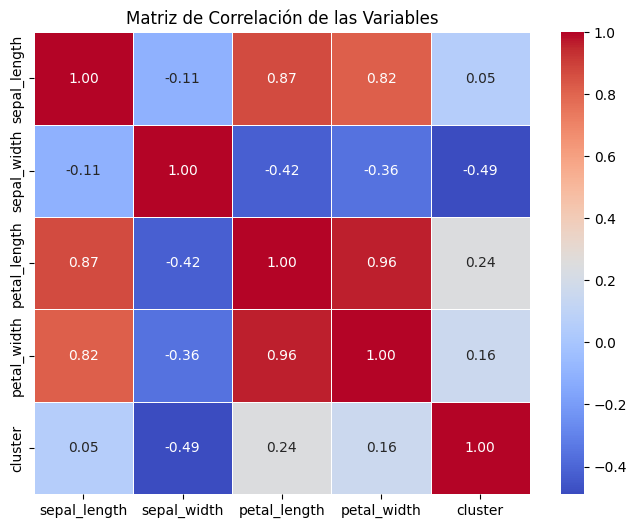

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

### Análisis de distribución de medidas de sépalos por clusters

C:\Users\jmper\AppData\Local\Temp\ipykernel_8724\1793157064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='sepal_length', data=df, palette='viridis')


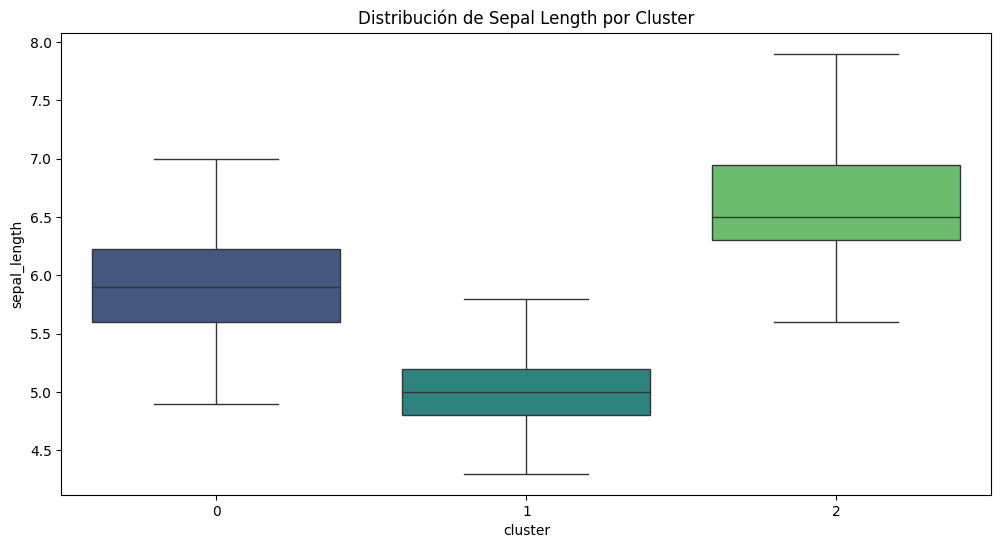

C:\Users\jmper\AppData\Local\Temp\ipykernel_8724\1793157064.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='sepal_width', data=df, palette='viridis')


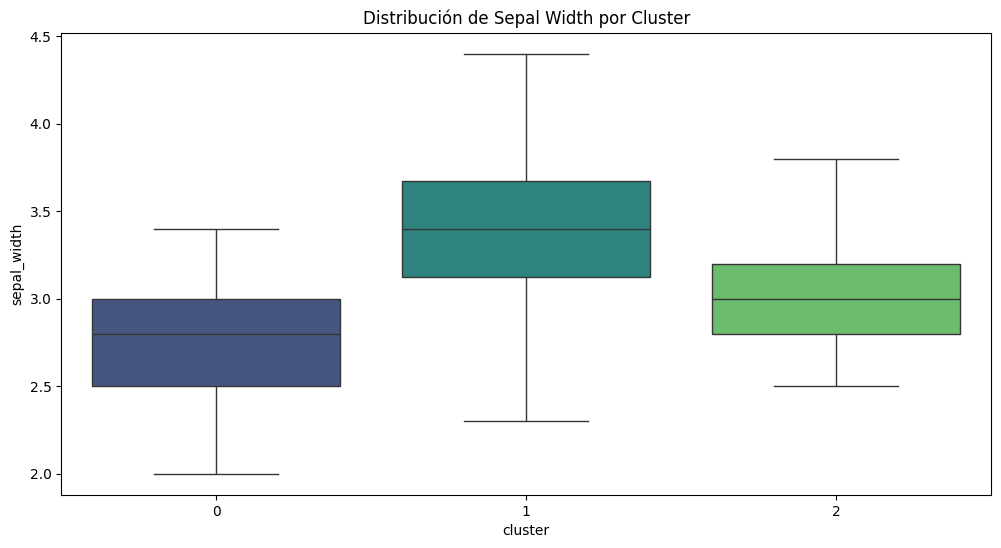

In [20]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='sepal_length', data=df, palette='viridis')
plt.title('Distribución de Sepal Length por Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='sepal_width', data=df, palette='viridis')
plt.title('Distribución de Sepal Width por Cluster')
plt.show()


### Análisis de distribución de medidas de pétalos por clusters

C:\Users\jmper\AppData\Local\Temp\ipykernel_8724\2744424484.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_petal', y='petal_length', data=df, palette='viridis')


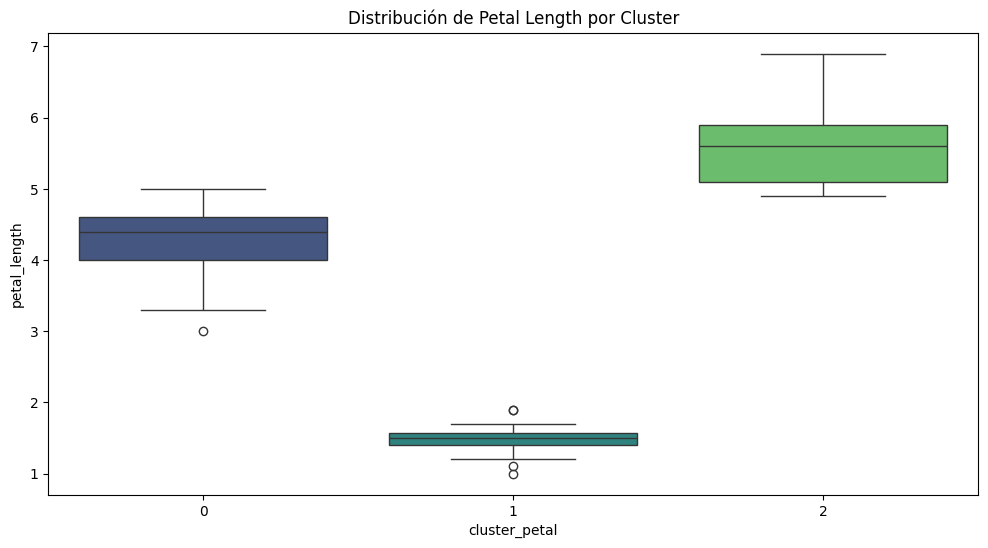

C:\Users\jmper\AppData\Local\Temp\ipykernel_8724\2744424484.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_petal', y='petal_width', data=df, palette='viridis')


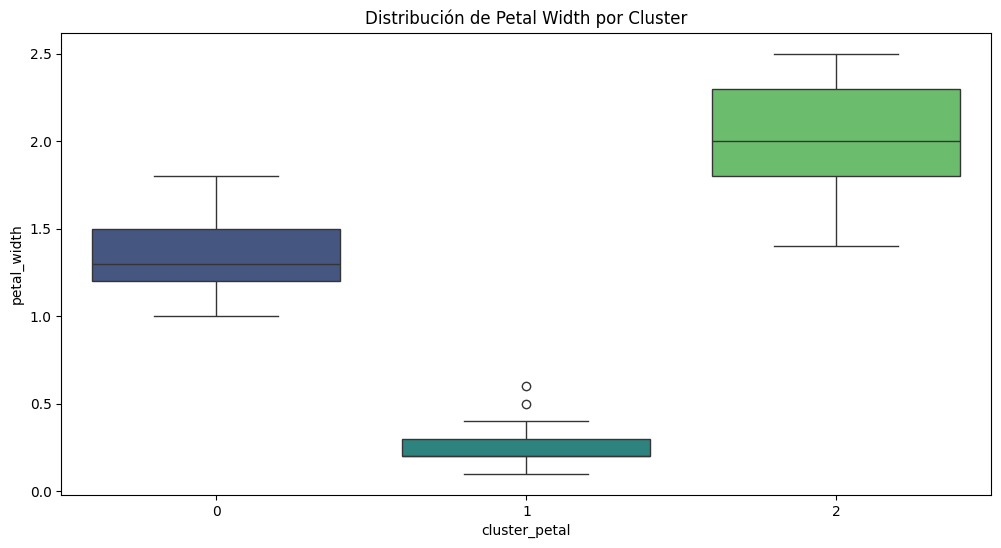

In [22]:
X_petal = df[["petal_length", "petal_width"]]

optimal_k = 3 
kmeans_petal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_petal'] = kmeans_petal.fit_predict(X_petal)

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_petal', y='petal_length', data=df, palette='viridis')
plt.title('Distribución de Petal Length por Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster_petal', y='petal_width', data=df, palette='viridis')
plt.title('Distribución de Petal Width por Cluster')
plt.show()